In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('dataset/youtube/USvideos.csv')

In [77]:
features = ['likes', 'dislikes', 'comment_count']

In [78]:
X = df[features]
y = df['views']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 10713484517263.709
R-squared: 0.7775032760136769


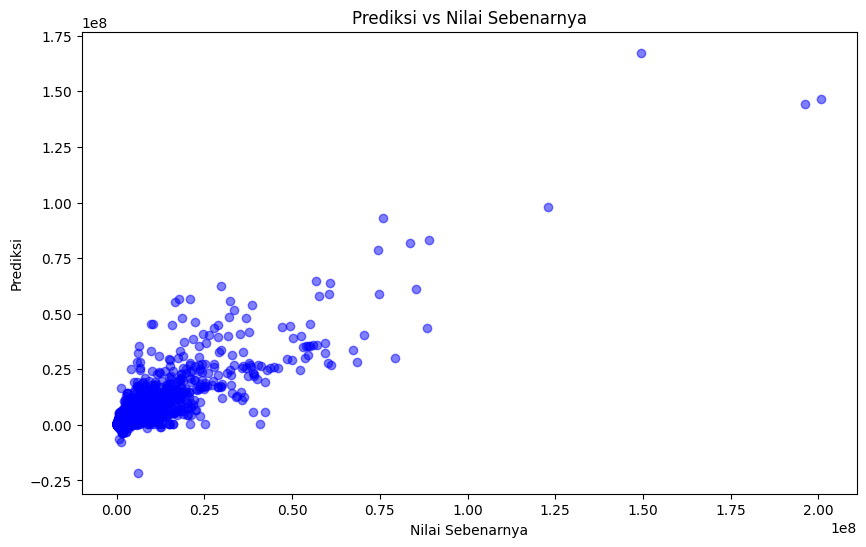

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.show()

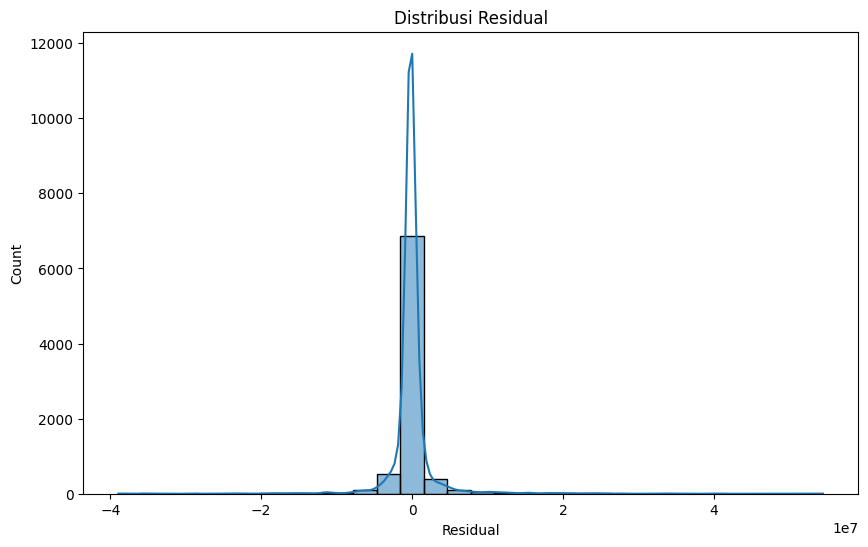

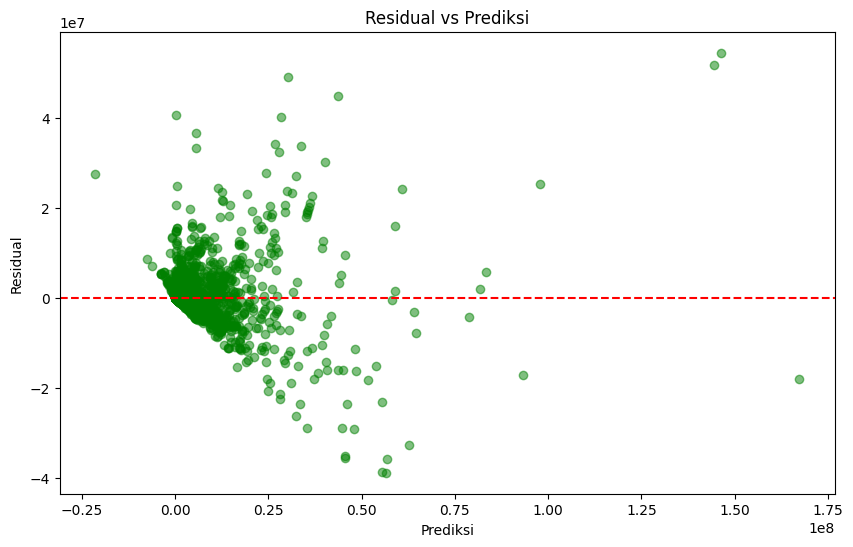

In [86]:
# Plot distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Plot residual vs nilai prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

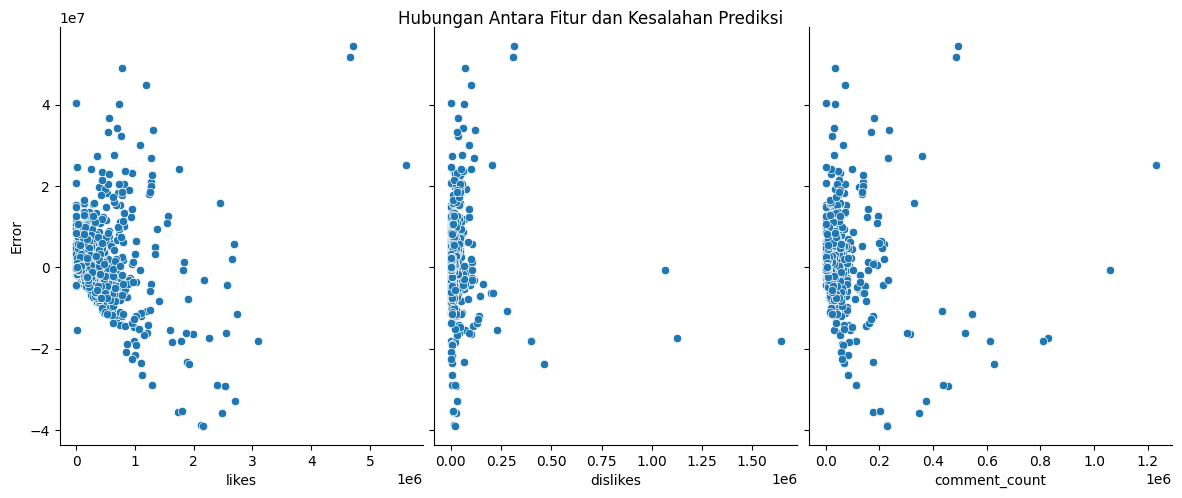

In [88]:
# Menambahkan kolom error ke dalam DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': residuals,
    'likes': X_test['likes'],
    'dislikes': X_test['dislikes'],
    'comment_count': X_test['comment_count']
})

# Evaluasi kesalahan prediksi berdasarkan fitur lainnya
sns.pairplot(results, x_vars=['likes', 'dislikes', 'comment_count'], y_vars='Error', height=5, aspect=0.8, kind='scatter')
plt.suptitle('Hubungan Antara Fitur dan Kesalahan Prediksi')
plt.show()